In [10]:
## import pre-lim libs 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
## read in data 
df = pd.read_csv('mushrooms.csv')

In [3]:
## preview data 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
## see the size of the dataset 
df.shape

(8124, 23)

In [5]:
## what types of data are we dealing with 
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Every column is an object so we are going to have to use one hot encoding. This may be an indicator that a tree based algorthm might be our best appropach since we will not be able to observe any kind of linear relationships from binary numbers

In [70]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [6]:
## see if we are dealing with any null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No missing values

In [72]:
## we could see from our graph below that there are some ? symbols in the mushrrom classifier which represnt null, 
## we will identify these and replace with null 
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count())    

stalk-root 2480


In [74]:
import numpy as np
df["stalk-root"] =df["stalk-root"].replace('?',np.nan)  

In [78]:
## we can now impute this columns 
from autoimpute.imputations import SingleImputer,MultipleImputer
impute = SingleImputer(strategy='categorical')
impute.fit(df)
df = impute.transform(df)
df

ModuleNotFoundError: No module named 'autoimpute'

In [81]:
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

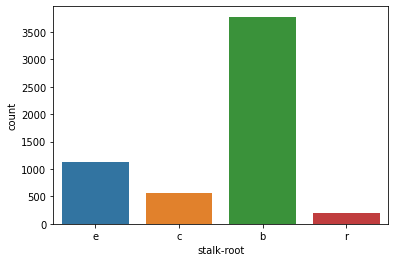

In [79]:
sns.countplot(df["stalk-root"])

In [12]:
## lets see how many unique values are in each column
for col in df.columns:
    print("Number of unique values for", col, "is", df[col].nunique())

Number of unique values for class is 2
Number of unique values for cap-shape is 6
Number of unique values for cap-surface is 4
Number of unique values for cap-color is 10
Number of unique values for bruises is 2
Number of unique values for odor is 9
Number of unique values for gill-attachment is 2
Number of unique values for gill-spacing is 2
Number of unique values for gill-size is 2
Number of unique values for gill-color is 12
Number of unique values for stalk-shape is 2
Number of unique values for stalk-root is 5
Number of unique values for stalk-surface-above-ring is 4
Number of unique values for stalk-surface-below-ring is 4
Number of unique values for stalk-color-above-ring is 9
Number of unique values for stalk-color-below-ring is 9
Number of unique values for veil-type is 1
Number of unique values for veil-color is 4
Number of unique values for ring-number is 3
Number of unique values for ring-type is 5
Number of unique values for spore-print-color is 9
Number of unique values 

We can drop veil type as there is just 1 constant value. Cardinality of these other columns if fairly low, so we will not have to make any adjustments

In [12]:
df.drop(columns=['veil-type'], inplace=True)

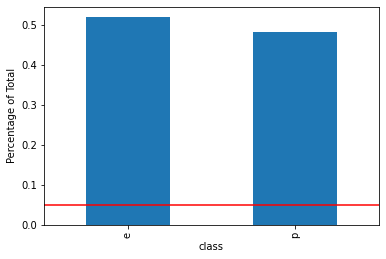

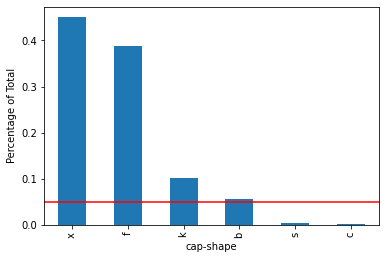

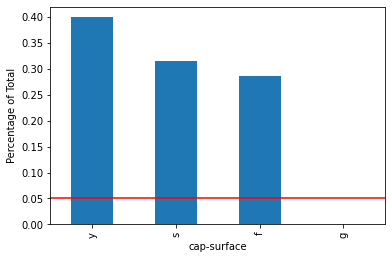

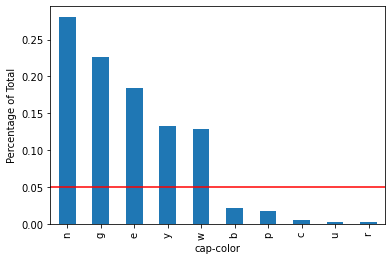

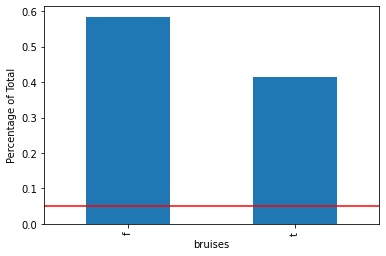

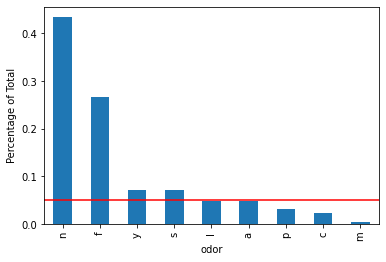

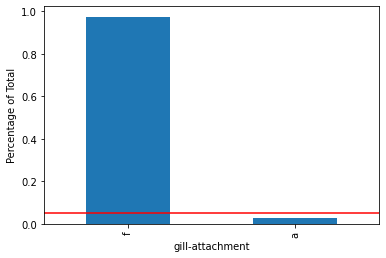

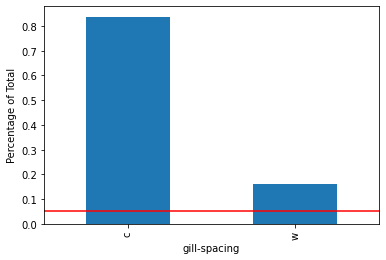

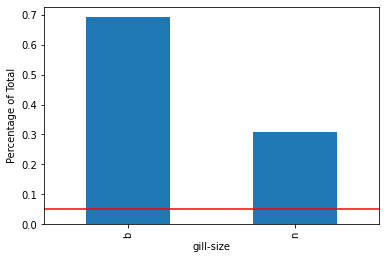

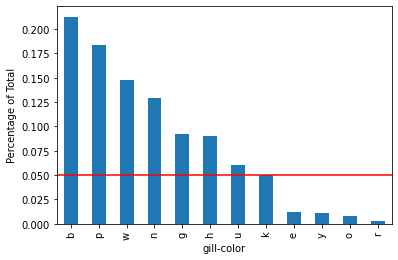

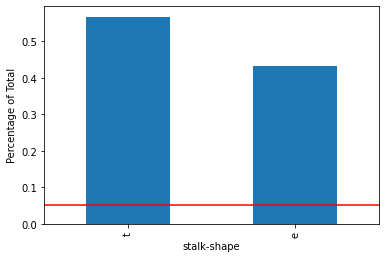

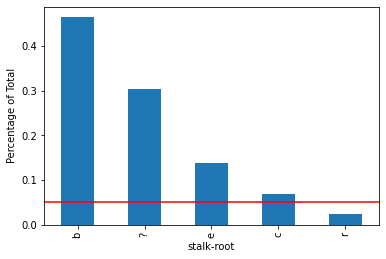

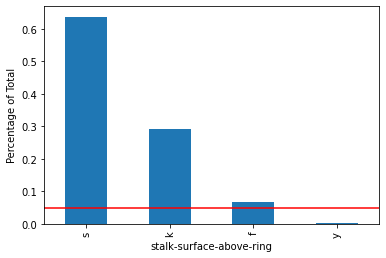

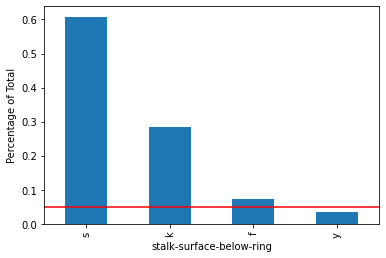

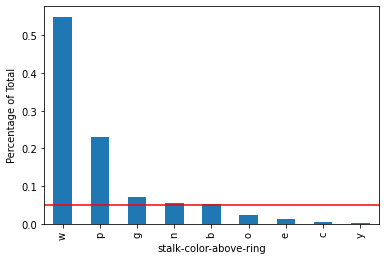

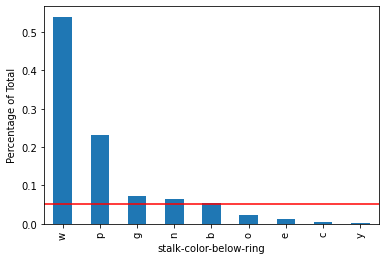

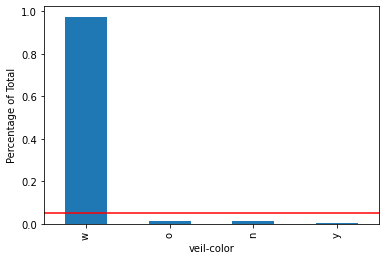

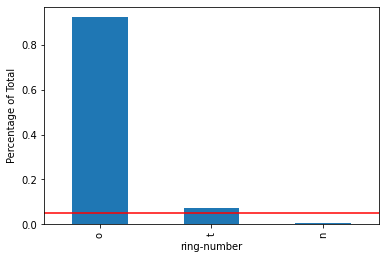

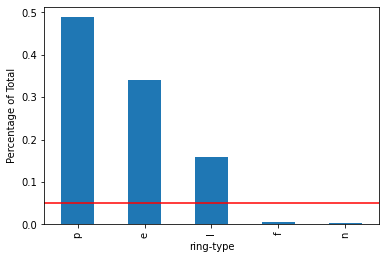

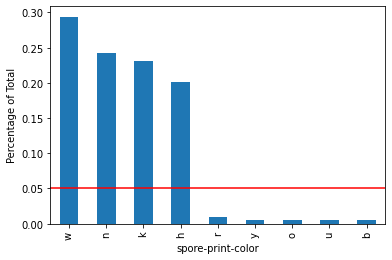

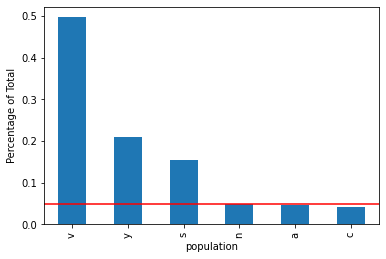

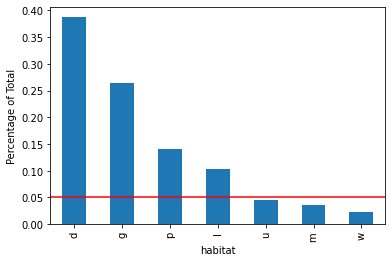

In [20]:
## lets try to understand the distribution of the data 
import matplotlib.pyplot as plt
import seaborn as sns

# Let's plot the category frequency.
# That is, the percentage of houses with each label.

total = len(data)

# For each categorical variable
for col in df:

    # Count the number of houses per category
    # and divide by total houses.

    # That is, the percentage of houses per category.

    temp_df = pd.Series(df[col].value_counts() / total)

    # Make plot with these percentages.
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Add a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of Total')
    plt.show()


Target column seems balanced, so we do not need to deal with this. We do see some rare labels which can sometimes cause overfitting when it comes to tree based models. It might be smart to group these rare lables with categorical columns that have more than 2 values. We can come back to this is we see overfitting. Lets go ahead and and encode all of this data using OHE.

#### Function for Grouping rare labels, if needed

I will replace all labels that appear in less than 5%


def group_rare_labels(df, var):

    total = len(df)

    # First, I calculate the % of houses per category.
    temp_df = pd.Series(df[var].value_counts() / total)

    # Then, I create a dictionary to replace the rare labels with the
    # string 'rare' (for categories present in less than 5% of total).

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # Now, I replace the rare categories.
    tmp = df[var].map(grouping_dict)

    return tmp

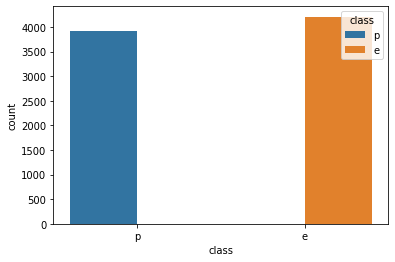

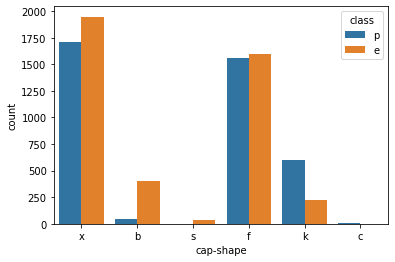

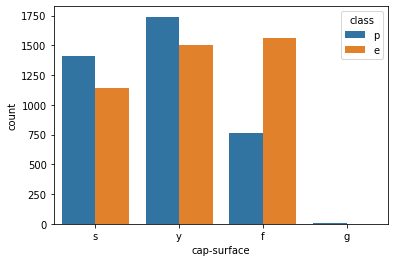

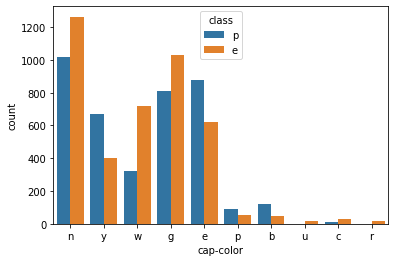

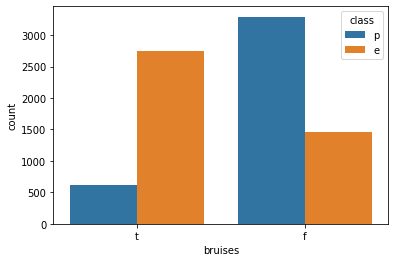

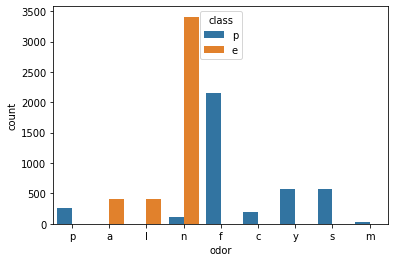

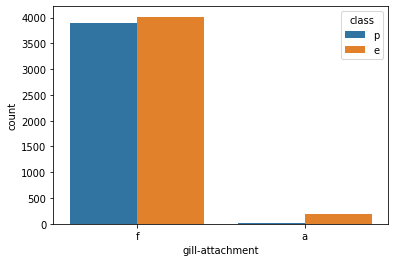

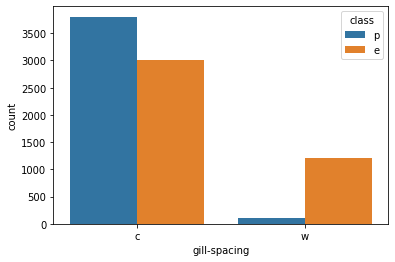

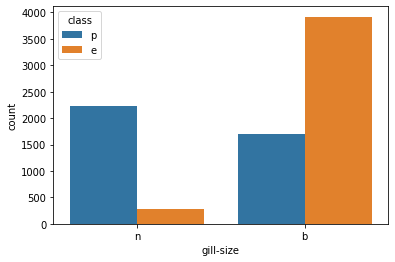

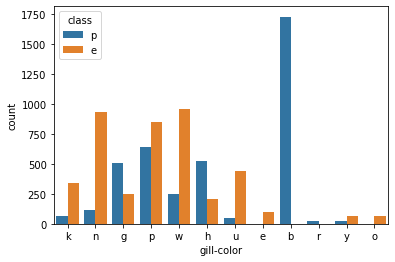

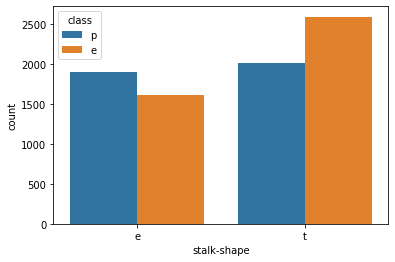

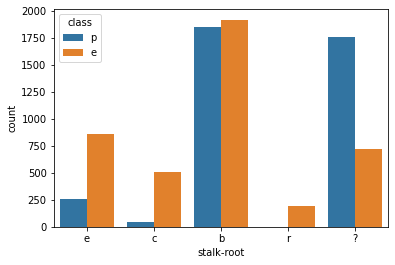

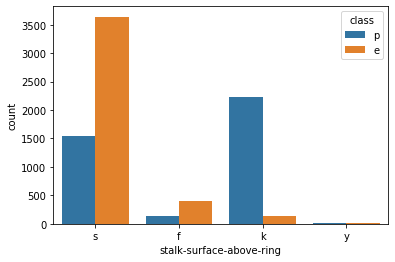

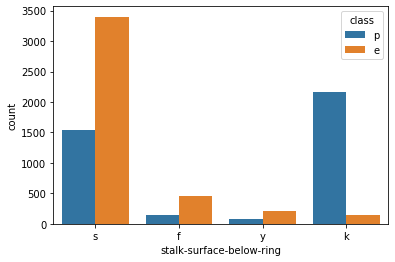

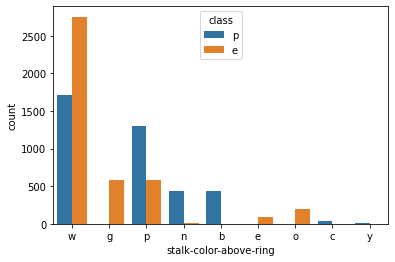

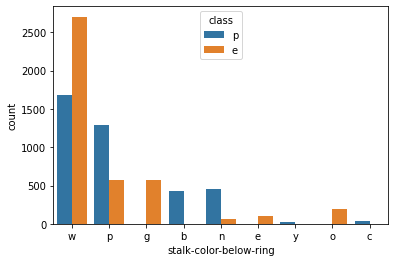

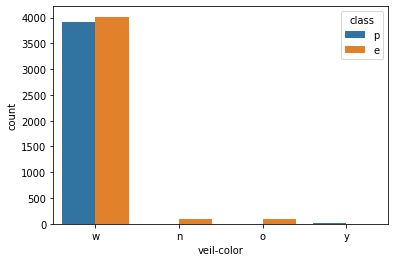

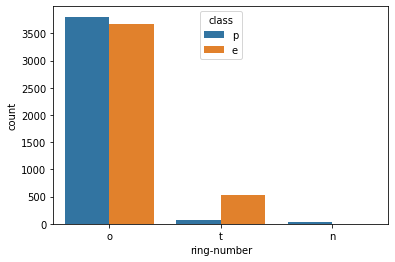

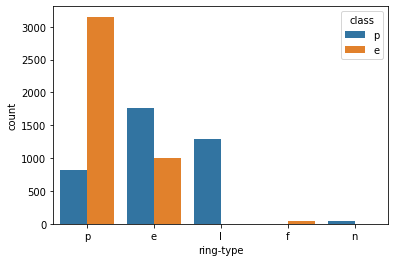

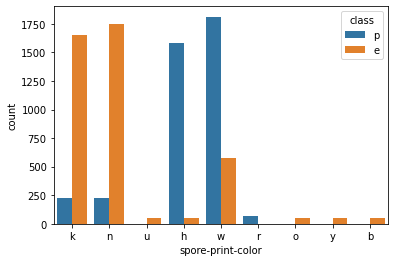

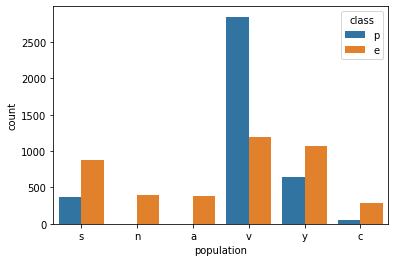

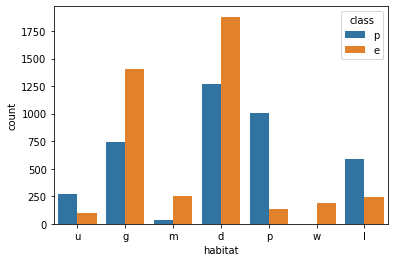

In [67]:
## understand the relationship to the target
# countplot of every variable with hue = class/target
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, hue='class', data=df)


In [14]:
## use get dummies to encode this data. Since every single column needs to be encoded, we can just use the 
## encoded data as our new df 
data = pd.get_dummies(df, drop_first=True)

In [15]:
data

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [16]:
## split this data into x and y 
x = data.drop(columns=['class_p'])
y = data.class_p

In [17]:
x

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [18]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class_p, Length: 8124, dtype: uint8

In [44]:
## split into our train test and split data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [45]:
x_train

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3887,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4119,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1600,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4988,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
6757,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5390,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
860,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7603,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [46]:
y_train

3887    1
4119    1
1600    0
4988    1
6757    1
       ..
5226    1
5390    0
860     0
7603    1
7270    0
Name: class_p, Length: 6093, dtype: uint8

In [47]:
## start with our tree based models and then expand from here if needed - in our deployment we will create a pipeline
## that will test each one of these models live 
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
dt = DecisionTreeClassifier(random_state = 0)

In [49]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
y_pred_dt = dt.predict(x_test)

In [51]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [66]:
print("AUC:", roc_auc_score(y_test, y_pred_dt))

AUC: 1.0


In [52]:
rf = RandomForestClassifier(random_state=0)

In [53]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [54]:
y_pred_rf = rf.predict(x_test)

In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [68]:
print("AUC:", roc_auc_score(y_test, y_pred_rf))

AUC: 1.0


Both trained models have reached 100% accuracy